#                                           CAPSTONE PROJECT II
## A RELATIONSHIP STUDY OF THE UNDERLYING FACTORS AFFETING THE MORTALITY RATE OF COVID-19 IN THE UNITED STATES OF AMERICA

Importing dependencies

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

The dataset was downloaded from a github site which hosted the data from the CDC.
The Data is read into the dataframe and the column "Sex" is set as the index

In [13]:
cf = pd.read_csv('https://data.cdc.gov/api/views/9bhg-hcku/rows.csv?accessType=DOWNLOAD', index_col ="Sex" )
cf.head()

,Data as of,Start week,End Week,State,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
Sex,,,,,,,,,,,,
All Sexes,05/20/2020,02/01/2020,05/16/2020,United States,Under 1 year,3.0,4651.0,41.0,1.0,13.0,56.0,NaN
All Sexes,05/20/2020,02/01/2020,05/16/2020,United States,1-4 years,2.0,899.0,36.0,2.0,38.0,74.0,NaN
All Sexes,05/20/2020,02/01/2020,05/16/2020,United States,5-14 years,7.0,1335.0,43.0,0.0,44.0,94.0,NaN
All Sexes,05/20/2020,02/01/2020,05/16/2020,United States,15-24 years,76.0,8165.0,173.0,24.0,46.0,267.0,NaN
All Sexes,05/20/2020,02/01/2020,05/16/2020,United States,25-34 years,463.0,17447.0,619.0,206.0,138.0,1001.0,NaN


In [14]:
cf.shape

(1416, 12)

Dropping some columns which are not needed for this analysis

In [15]:
cf.drop(['Data as of', 'Start week', 'End Week', 'Footnote', 'State'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
cf.head()

,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
Sex,,,,,,,
All Sexes,Under 1 year,3.0,4651.0,41.0,1.0,13.0,56.0
All Sexes,1-4 years,2.0,899.0,36.0,2.0,38.0,74.0
All Sexes,5-14 years,7.0,1335.0,43.0,0.0,44.0,94.0
All Sexes,15-24 years,76.0,8165.0,173.0,24.0,46.0,267.0
All Sexes,25-34 years,463.0,17447.0,619.0,206.0,138.0,1001.0


In [16]:
# dropping passed values 
cf.drop(["All Sexes", "All Sexes Total", "Unknown", 
                            "Female Total", "Male Total", "All sexes"], inplace = True)
cf.head()

,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
Sex,,,,,,,
Male,Under 1 year,2.0,2567.0,29.0,1.0,7.0,37.0
Male,1-4 years,1.0,507.0,20.0,1.0,22.0,42.0
Male,5-14 years,5.0,792.0,20.0,0.0,18.0,43.0
Male,15-24 years,51.0,6038.0,105.0,16.0,24.0,161.0
Male,25-34 years,318.0,12113.0,380.0,145.0,71.0,615.0


Resetting the index

In [17]:
cf.reset_index(drop=False, inplace=True)

Storing the filtered dataset into a new dataframe

In [18]:
cf1 = cf.set_index('Age group')
cf1.head()

,Sex,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
Age group,,,,,,,
Under 1 year,Male,2.0,2567.0,29.0,1.0,7.0,37.0
1-4 years,Male,1.0,507.0,20.0,1.0,22.0,42.0
5-14 years,Male,5.0,792.0,20.0,0.0,18.0,43.0
15-24 years,Male,51.0,6038.0,105.0,16.0,24.0,161.0
25-34 years,Male,318.0,12113.0,380.0,145.0,71.0,615.0


In [19]:
cf1['Sex'] = cf1['Sex'].str.replace('male', 'Male')
cf1['Sex'] = cf1['Sex'].str.replace('female', 'Female')

In [20]:
cf1 = cf.dropna(axis=0, how='any')

In [21]:
cf1.reset_index(drop=False, inplace=True)

In [22]:
cf1.shape

(339, 9)

In [23]:
cf1.head()

,index,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,0,Male,Under 1 year,2.0,2567.0,29.0,1.0,7.0,37.0
1,1,Male,1-4 years,1.0,507.0,20.0,1.0,22.0,42.0
2,2,Male,5-14 years,5.0,792.0,20.0,0.0,18.0,43.0
3,3,Male,15-24 years,51.0,6038.0,105.0,16.0,24.0,161.0
4,4,Male,25-34 years,318.0,12113.0,380.0,145.0,71.0,615.0


In [24]:
cf1.drop(['index'], axis=1, inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
cf1.drop(cf1.index[0:22],0,inplace=True)
cf1.head()

,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
22,Male,1-4 years,0.0,12.0,0.0,0.0,0.0,0.0
23,Male,5-14 years,0.0,18.0,0.0,0.0,0.0,0.0
24,Male,65-74 years,59.0,1927.0,138.0,15.0,14.0,196.0
25,Female,Under 1 year,0.0,32.0,0.0,0.0,0.0,0.0
26,Female,65-74 years,39.0,1456.0,85.0,13.0,11.0,122.0


# Visualizing Data using Matplotlib<a id="4"></a>

Import `Matplotlib`.

In [26]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [27]:
!pip install seaborn
import seaborn as sns
sns.set(style="ticks", color_codes=True)

Text(0, 0.5, 'Frequency')

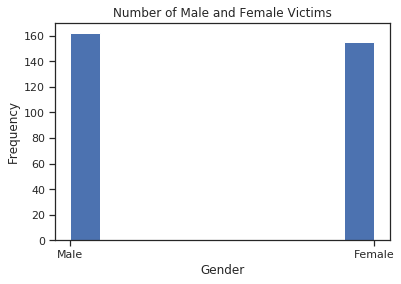

In [28]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(cf1['Sex'])
# set title and labels
ax.set_title('Number of Male and Female Victims')
ax.set_xlabel('Gender')
ax.set_ylabel('Frequency')

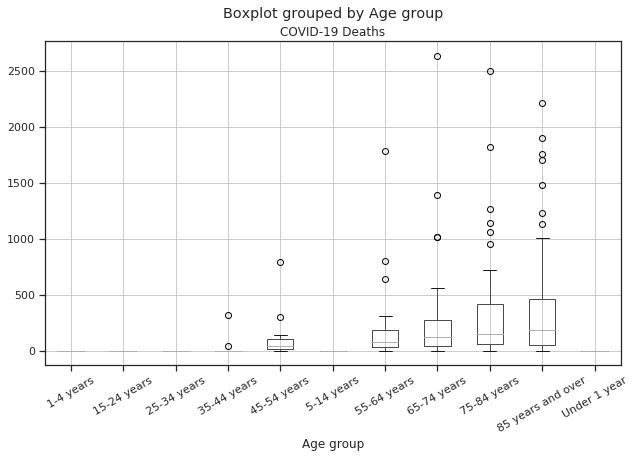

In [60]:
cf1.boxplot('COVID-19 Deaths','Age group',rot = 30,figsize=(10,6))

Visualizing the factors influencing mortality rate 

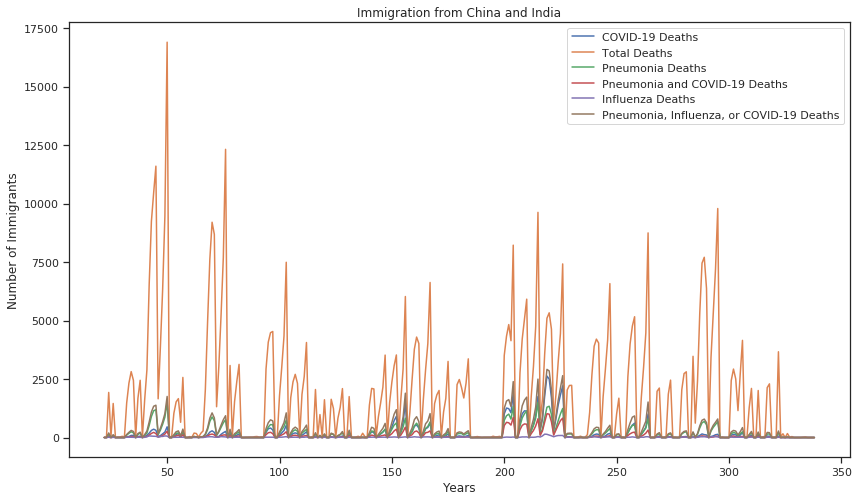

In [62]:
### type your answer here
cf1.index = cf1.index.map(int)
cf1.plot(kind='line', figsize=(14, 8))
plt.title('Immigration from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

                          COVID-19 Deaths  Total Deaths  Pneumonia Deaths  \
Age group         Sex                                                       
1-4 years         Female              0.0          37.0               0.0   
                  Male                0.0          76.0               0.0   
15-24 years       Female              0.0         148.0               0.0   
                  Male                0.0         825.0              13.0   
25-34 years       Female              0.0         129.0               0.0   
                  Male                0.0         249.0               0.0   
35-44 years       Female              0.0         151.0               0.0   
                  Male              362.0        2435.0             221.0   
45-54 years       Female            359.0        3750.0             349.0   
                  Male             1134.0       11252.0             972.0   
5-14 years        Female              0.0          79.0               0.0   

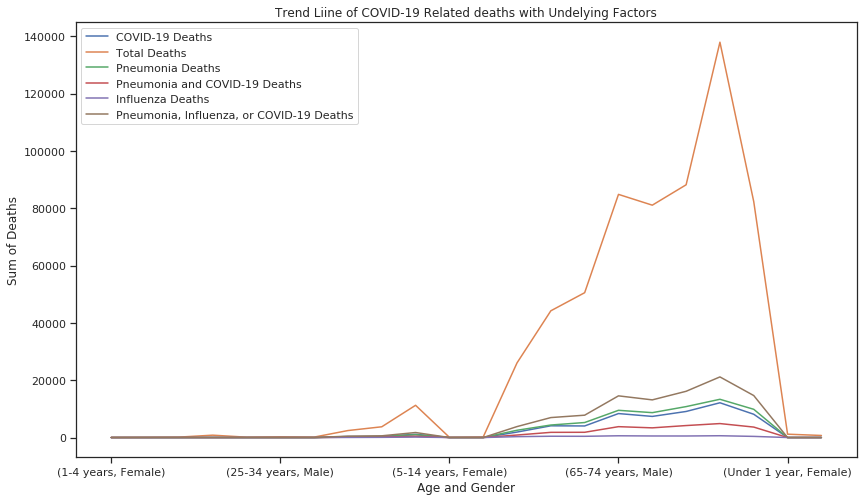

In [63]:
cf7 = cf1.groupby(['Age group', 'Sex']).sum()
points = data.index
cf7.head(5)
print(cf7)
cf7.plot(kind='line', figsize=(14, 8))
plt.title('Trend Liine of COVID-19 Related deaths with Undelying Factors')
plt.ylabel('Sum of Deaths')
plt.xlabel('Age and Gender')
plt.show()

                   COVID-19 Deaths  Total Deaths  Pneumonia Deaths  \
Age group                                                            
1-4 years                 0.000000      5.380952          0.000000   
15-24 years               0.000000     60.812500          0.812500   
25-34 years               0.000000     29.076923          0.000000   
35-44 years              40.222222    287.333333         24.555556   
45-54 years             124.416667   1250.166667        110.083333   
5-14 years                0.000000     14.421053          0.000000   
55-64 years             181.757576   2129.969697        209.303030   
65-74 years             269.652174   2943.739130        320.391304   
75-84 years             343.062500   3527.208333        405.812500   
85 years and over       413.346939   4495.836735        473.469388   
Under 1 year              0.000000     37.000000          0.000000   

                   Pneumonia and COVID-19 Deaths  Influenza Deaths  \
Age group          

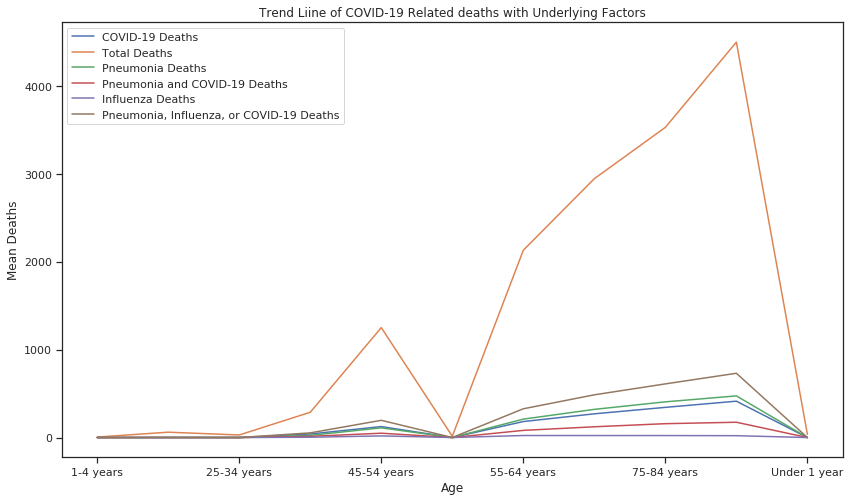

In [64]:
cf7 = cf1.groupby(['Age group']).mean()
points = data.index
cf7.head(5)
print(cf7)
cf7.plot(kind='line', figsize=(14, 8))
plt.title('Trend Liine of COVID-19 Related deaths with Underlying Factors')
plt.ylabel('Mean Deaths')
plt.xlabel('Age')
plt.show()

Making a copy of the dataset into a new dataframe for further analysis so as not to temper with the format of the data in the previous dataframe


In [29]:
df = cf1.copy()

In [30]:
df.shape

(317, 8)

In [31]:
df.head()

,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
22,Male,1-4 years,0.0,12.0,0.0,0.0,0.0,0.0
23,Male,5-14 years,0.0,18.0,0.0,0.0,0.0,0.0
24,Male,65-74 years,59.0,1927.0,138.0,15.0,14.0,196.0
25,Female,Under 1 year,0.0,32.0,0.0,0.0,0.0,0.0
26,Female,65-74 years,39.0,1456.0,85.0,13.0,11.0,122.0


<h2 id="indicator">Indicator variable (or dummy variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>
<p>
    So we can use categorical variables for regression analysis in further analysis.
</p>
<b>Example</b>
<p>
    We see the column Sex has two variables, Female and Male. For further analysis like regression analysis, we convert this variable into dummy variable.
</p>

<p>
    We will use the panda's method 'get_dummies' to assign numerical values to different categories of Sex. 
</p>

In [32]:
dummy_variable_1 = pd.get_dummies(df["Sex"])
dummy_variable_1.head()

,Female,Male
22,0,1
23,0,1
24,0,1
25,1,0
26,1,0


In [33]:
dummy_variable_1.rename(columns={'Sex-Female':'Male', 'Sex-Female':'Female'}, inplace=True)
dummy_variable_1.head()

,Female,Male
22,0,1
23,0,1
24,0,1
25,1,0
26,1,0


We now have the value 0 to represent "Female" and 1 to represent "Male" in the column "Sex". We will now insert this column back into our original dataset. 

In [34]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("Sex", axis = 1, inplace=True)

In [35]:
df.head()

,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Female,Male
22,1-4 years,0.0,12.0,0.0,0.0,0.0,0.0,0,1
23,5-14 years,0.0,18.0,0.0,0.0,0.0,0.0,0,1
24,65-74 years,59.0,1927.0,138.0,15.0,14.0,196.0,0,1
25,Under 1 year,0.0,32.0,0.0,0.0,0.0,0.0,1,0
26,65-74 years,39.0,1456.0,85.0,13.0,11.0,122.0,1,0


## Correlation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p3>Pearson Correlation</p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

In [72]:
df[['Pneumonia and COVID-19 Deaths', 'COVID-19 Deaths']].corr()

,Pneumonia and COVID-19 Deaths,COVID-19 Deaths
Pneumonia and COVID-19 Deaths,1.000000,0.986769
COVID-19 Deaths,0.986769,1.000000


(0, 2767.348970342618)

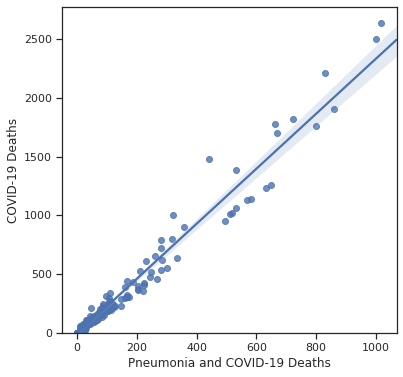

In [73]:
# Pneumonia as potential predictor variable of COVID-19 Deaths
width = 6
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="Pneumonia and COVID-19 Deaths", y="COVID-19 Deaths", data=df)
plt.ylim(0,)

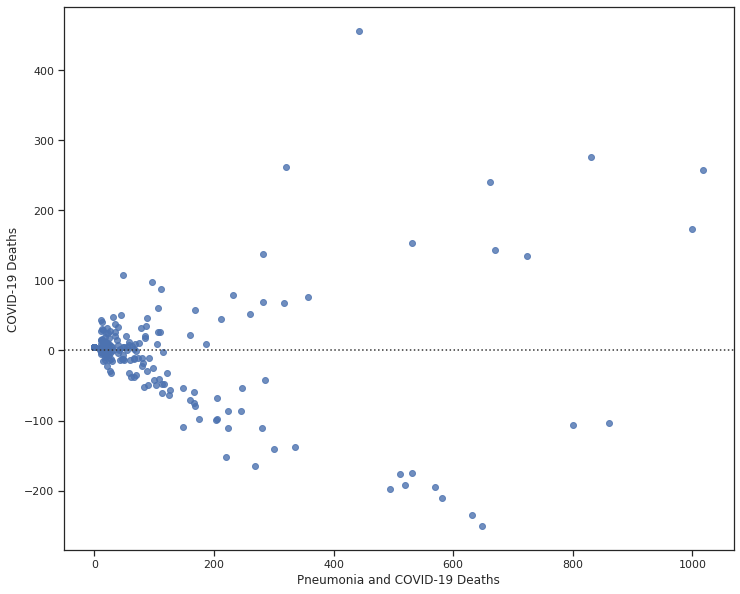

In [45]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['Pneumonia and COVID-19 Deaths'], df['COVID-19 Deaths'])
plt.show()

In [46]:
df[['Influenza Deaths', 'COVID-19 Deaths']].corr()

,Influenza Deaths,COVID-19 Deaths
Influenza Deaths,1.000000,0.740026
COVID-19 Deaths,0.740026,1.000000


(0, 2781.5060967061204)

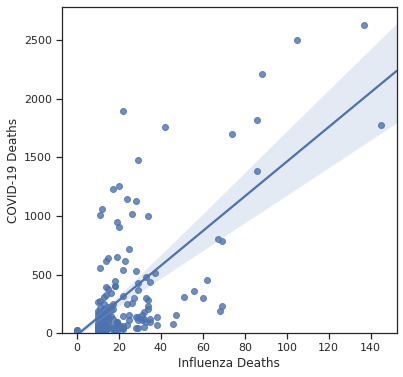

In [74]:
# Influenza Deaths as potential predictor variable of COVID-19 Deaths
width = 6
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="Influenza Deaths", y="COVID-19 Deaths", data=df)
plt.ylim(0,)

In [48]:
df[['Pneumonia, Influenza, or COVID-19 Deaths', 'COVID-19 Deaths']].corr()

,"Pneumonia, Influenza, or COVID-19 Deaths",COVID-19 Deaths
"Pneumonia, Influenza, or COVID-19 Deaths",1.000000,0.942917
COVID-19 Deaths,0.942917,1.000000


(0, 2769.4238021675515)

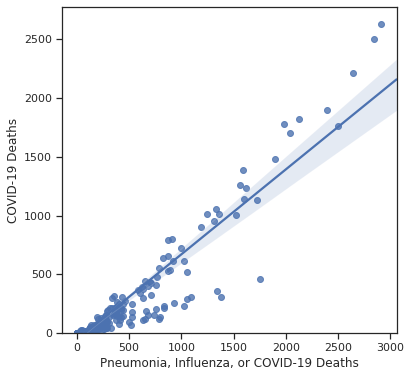

In [75]:
# Pneumonia, Influenza, or COVID-19 Deaths as potential predictor variable of COVID-19 Deaths
width = 6
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="Pneumonia, Influenza, or COVID-19 Deaths", y="COVID-19 Deaths", data=df)
plt.ylim(0,)

In [50]:
df[['Male', 'COVID-19 Deaths']].corr()

,Male,COVID-19 Deaths
Male,1.000000,0.033052
COVID-19 Deaths,0.033052,1.000000


The correlation here is a weak positive relationship

In [51]:
df[['Female', 'COVID-19 Deaths']].corr()

,Female,COVID-19 Deaths
Female,1.000000,-0.033052
COVID-19 Deaths,-0.033052,1.000000


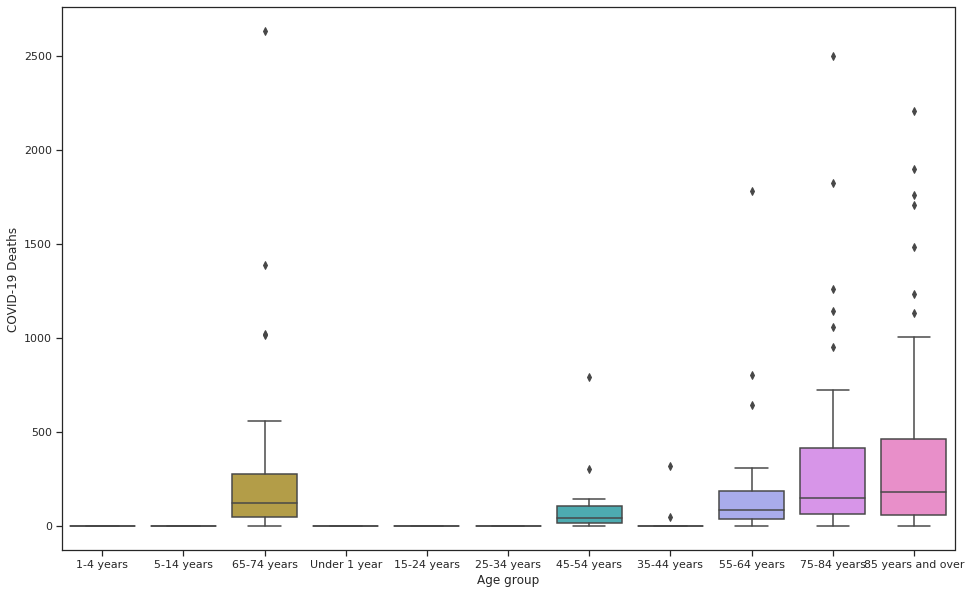

In [52]:
width = 16
height = 10
plt.figure(figsize=(width, height))
sns.boxplot(x="Age group", y="COVID-19 Deaths", data=df)

In [36]:
df['Age group'].value_counts()

Under 1 year         51
85 years and over    49
75-84 years          48
65-74 years          46
55-64 years          33
1-4 years            21
5-14 years           19
15-24 years          16
25-34 years          13
45-54 years          12
35-44 years           9
Name: Age group, dtype: int64

In [37]:
df['Age group'].value_counts().to_frame()

,Age group
Under 1 year,51
85 years and over,49
75-84 years,48
65-74 years,46
55-64 years,33
1-4 years,21
5-14 years,19
15-24 years,16
25-34 years,13
45-54 years,12


In [38]:
Age_counts = df['Age group'].value_counts().to_frame()
Age_counts.rename(columns={'Age group': 'value_counts'}, inplace=True)
Age_counts

,value_counts
Under 1 year,51
85 years and over,49
75-84 years,48
65-74 years,46
55-64 years,33
1-4 years,21
5-14 years,19
15-24 years,16
25-34 years,13
45-54 years,12


In [39]:
Age_counts.index.name = 'Age group'
Age_counts

,value_counts
Age group,
Under 1 year,51
85 years and over,49
75-84 years,48
65-74 years,46
55-64 years,33
1-4 years,21
5-14 years,19
15-24 years,16
25-34 years,13


In [40]:
df[['Age group','Male', 'Female', 'COVID-19 Deaths']].corr()

,Male,Female,COVID-19 Deaths
Male,1.000000,-1.000000,0.033052
Female,-1.000000,1.000000,-0.033052
COVID-19 Deaths,0.033052,-0.033052,1.000000


Identifying unique variables from the column Age group

In [42]:
df['Age group'].unique()

array(['1-4 years', '5-14 years', '65-74 years', 'Under 1 year',
       '15-24 years', '25-34 years', '45-54 years', '35-44 years',
       '55-64 years', '75-84 years', '85 years and over'], dtype=object)

In [43]:
df_g = df[['Age group','Male', 'Female', 'COVID-19 Deaths']]

In [44]:
df_g = df_g.groupby(['Age group'],as_index=False).mean()
df_g

,Age group,Male,Female,COVID-19 Deaths
0,1-4 years,0.523810,0.476190,0.000000
1,15-24 years,0.625000,0.375000,0.000000
2,25-34 years,0.538462,0.461538,0.000000
3,35-44 years,0.444444,0.555556,40.222222
4,45-54 years,0.666667,0.333333,124.416667
5,5-14 years,0.631579,0.368421,0.000000
6,55-64 years,0.515152,0.484848,181.757576
7,65-74 years,0.565217,0.434783,269.652174
8,75-84 years,0.500000,0.500000,343.062500
9,85 years and over,0.469388,0.530612,413.346939


<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [45]:
from scipy import stats

<h3>Pneumonia vs COVID-19 Deaths</h3>

Calculating the  Pearson Correlation Coefficient and P-value of 'Pneumonia' and 'COVID-19 Deaths'.

In [46]:
pearson_coef, p_value = stats.pearsonr(df['Pneumonia and COVID-19 Deaths'], df['COVID-19 Deaths'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9867690607385894  with a P-value of P = 5.8469945172214685e-251


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between Pneumonia and COVID-19 and COVID-19 related deaths is statistically significant, and the linear relationship is very strong (~0.986).</p>

<h3>Influenza Deaths vs COVID-19 Deaths</h3>

Calculating the  Pearson Correlation Coefficient and P-value of 'Influenza Deaths' and 'COVID-19 Deaths'.

In [63]:
pearson_coef, p_value = stats.pearsonr(df['Influenza Deaths'], df['COVID-19 Deaths'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7400259734856101  with a P-value of P = 3.3194425221736676e-56


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between Influenza deaths and COVID-19 related deaths is statistically significant, and the linear relationship is very strong (~0.740).</p>

<h3>Pneumonia, Influenza, or COVID-19 Deaths vs COVID-19 Deaths</h3>

Calculating the  Pearson Correlation Coefficient and P-value of 'Pneumonia, Influenza, or COVID-19 Deaths' and 'COVID-19 Deaths'.

In [64]:
pearson_coef, p_value = stats.pearsonr(df['Pneumonia, Influenza, or COVID-19 Deaths'], df['COVID-19 Deaths'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9429169547774187  with a P-value of P = 1.81640194691185e-152


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between Pneumonia, Influenza, or COVID-19 deaths and COVID-19 related deaths is statistically significant, and the linear relationship is very strong (~0.942).</p>

<h2 id="anova"> ANOVA</h2>

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

<h3>Age group</h3>

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, I do not need to take the average before hand.</p>

<p>I check to see if the different 'Age groups' impact  'COVID-19 Deaths', I group the data.</p>

In [48]:
df_gtest = df[['Age group','Pneumonia and COVID-19 Deaths','COVID-19 Deaths']]
gtest1 = df_gtest.groupby(['Age group','Pneumonia and COVID-19 Deaths'],as_index=False).mean()
gtest1.head()

,Age group,Pneumonia and COVID-19 Deaths,COVID-19 Deaths
0,1-4 years,0.0,0.0
1,15-24 years,0.0,0.0
2,25-34 years,0.0,0.0
3,35-44 years,0.0,0.0
4,35-44 years,24.0,45.0


In [49]:
grouped_test2=df_gtest[['Age group', 'COVID-19 Deaths']].groupby(['Age group'])
grouped_test2.head()

,Age group,COVID-19 Deaths
22,1-4 years,0.0
23,5-14 years,0.0
24,65-74 years,59.0
25,Under 1 year,0.0
26,65-74 years,39.0
27,1-4 years,0.0
28,15-24 years,0.0
29,25-34 years,0.0
30,45-54 years,0.0
31,35-44 years,0.0


In [50]:
grouped_test2.get_group('85 years and over')['COVID-19 Deaths']

35       91.0
45      310.0
50      458.0
55      186.0
57      211.0
63       21.0
66       26.0
71      218.0
76      261.0
97      323.0
103     518.0
108     169.0
112     246.0
116      49.0
120      40.0
124      19.0
128      68.0
142     209.0
147     344.0
152     905.0
156    1482.0
162     405.0
167     618.0
171     115.0
175     148.0
181      54.0
184      95.0
202    1233.0
204    1899.0
210    1131.0
215    1758.0
221    1703.0
226    2208.0
242     138.0
247     180.0
251      34.0
258     615.0
264    1004.0
274      39.0
284      30.0
290     110.0
295     137.0
303     115.0
306     214.0
318      53.0
322      64.0
324       0.0
332       0.0
338       0.0
Name: COVID-19 Deaths, dtype: float64

In [68]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Under 1 year')['COVID-19 Deaths'], grouped_test2.get_group('1-4 years')['COVID-19 Deaths'], grouped_test2.get_group('5-14 years')['COVID-19 Deaths'], grouped_test2.get_group('15-24 years')['COVID-19 Deaths'], grouped_test2.get_group('25-34 years')['COVID-19 Deaths'], grouped_test2.get_group('35-44 years')['COVID-19 Deaths'], grouped_test2.get_group('45-54 years')['COVID-19 Deaths'], grouped_test2.get_group('55-64 years')['COVID-19 Deaths'], grouped_test2.get_group('65-74 years')['COVID-19 Deaths'], grouped_test2.get_group('75-84 years')['COVID-19 Deaths'], grouped_test2.get_group('85 years and over')['COVID-19 Deaths'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 6.369119241678682 , P = 6.659359369443497e-09


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all tested groups are all highly correlated? 

#### Separately: Age 75-84 and 85 years and older

In [69]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('75-84 years')['COVID-19 Deaths'], grouped_test2.get_group('85 years and over')['COVID-19 Deaths'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 0.4237770643492518 , P = 0.5166298631366639


Examining other age groups with high death rate means

#### Age 35-44 years and 85 years and over

In [70]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('35-44 years')['COVID-19 Deaths'], grouped_test2.get_group('85 years and over')['COVID-19 Deaths'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 3.880356041826299 , P = 0.05380750264947189


#### Age 45-54 years and 85 years and over

In [71]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('45-54 years')['COVID-19 Deaths'], grouped_test2.get_group('85 years and over')['COVID-19 Deaths'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 3.013379617413369 , P = 0.08780001694157236


#### Age 55-64 years and 85 years and over

In [72]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('55-64 years')['COVID-19 Deaths'], grouped_test2.get_group('85 years and over')['COVID-19 Deaths'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 4.508392166647833 , P = 0.03681961225893864


#### Age 65-74 years and 85 years and over

In [73]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('65-74 years')['COVID-19 Deaths'], grouped_test2.get_group('85 years and over')['COVID-19 Deaths'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 1.8570432348316903 , P = 0.17625719877172713


#### Age 45-54 years and 85 years and over

In [51]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('45-54 years')['COVID-19 Deaths'], grouped_test2.get_group('85 years and over')['COVID-19 Deaths'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 3.013379617413369 , P = 0.08780001694157236


<h3>Conclusion: Important Variables</h3>

p>The analysis has indicated which variable are more important and what variables are to be taken into account when dealing with COVID-19 Infections and death. I have narrowed it down to the following variables</p>

Continuous numerical variables:
<ul>
    <li>Pneumonia and COVID-19 Deaths</li>
    <li>Infulenza Deaths</li>
    <li>Pneumonia, Influenza, or COVID-19 Deaths</li>
  
</ul>
    
Categorical variable:
<ul>
    <li>Age group</li>
</ul>